In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import cv2
from swap import FaceSwapping
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
face_swapping = FaceSwapping(reference_path='imgs/reference.png')

In [52]:
img = face_swapping.load_img('imgs/img.png')

In [53]:
img_swap = face_swapping(img)

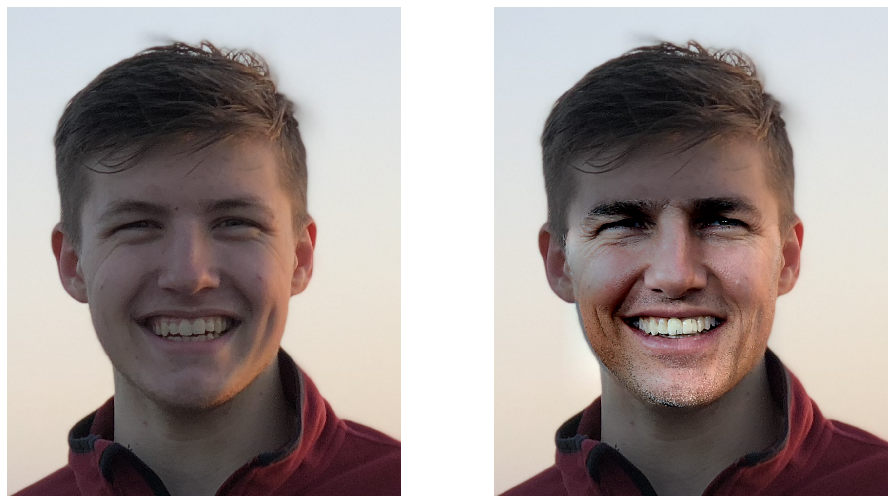

In [54]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

ax[0].imshow(img)
ax[0].axis(False)

ax[1].imshow(img_swap)
ax[1].axis(False)

plt.savefig('imgs/step_8.png')
plt.show()

In [55]:
from imutils.face_utils import rect_to_bb

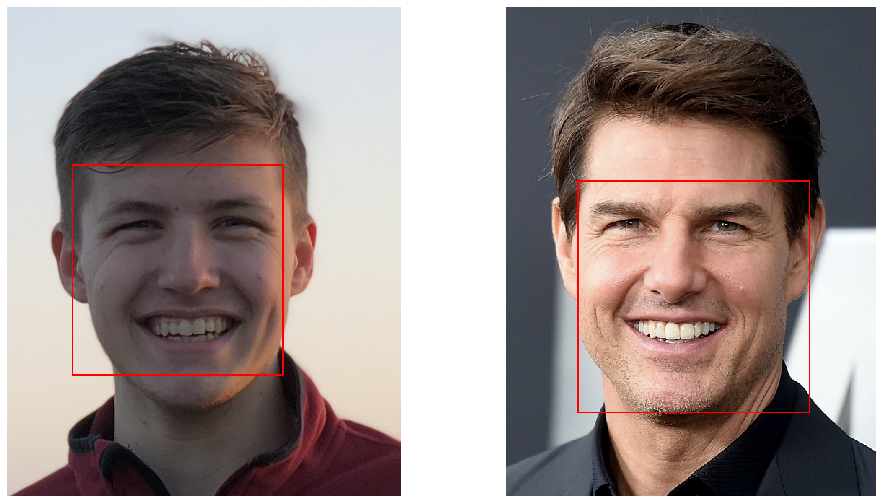

In [60]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

img_copy = img.copy()
x, y, w, h = rect_to_bb(face_swapping.detector(img)[0])
ax[0].imshow(cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0),3))
ax[0].axis(False)

img_copy = face_swapping.ref_img.copy()
x, y, w, h = rect_to_bb(face_swapping.detector(img)[0])
ax[1].imshow(cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0),3))
ax[1].axis(False)

plt.savefig('imgs/step_1.png')
plt.show()

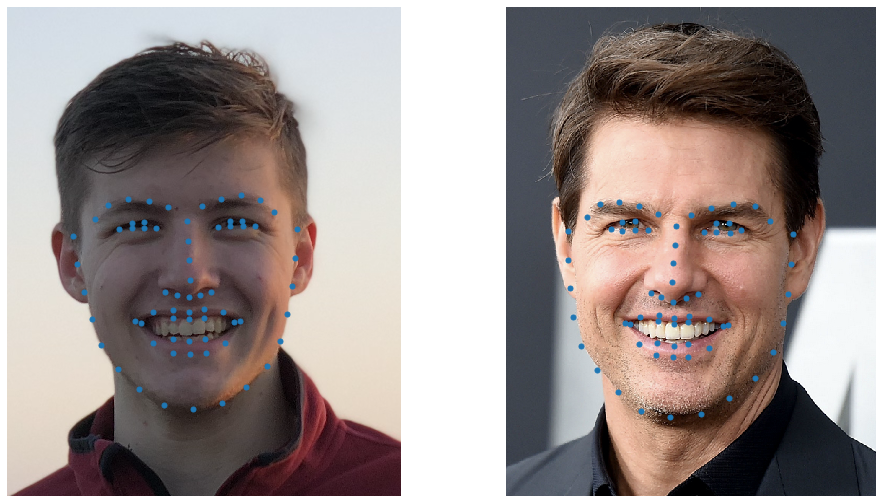

In [67]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

img_copy = img.copy()
kp = face_swapping.find_keypoints(img_copy)
ax[0].imshow(img_copy)
ax[0].plot(kp.T[0], kp.T[1], 'o', ms=5)
ax[0].axis(False)
    
img_copy = face_swapping.ref_img.copy()
kp = face_swapping.ref_keypoints
ax[1].imshow(img_copy)
ax[1].plot(kp.T[0], kp.T[1], 'o', ms=5)
ax[1].axis(False)

plt.savefig('imgs/step_2.png')
plt.show()

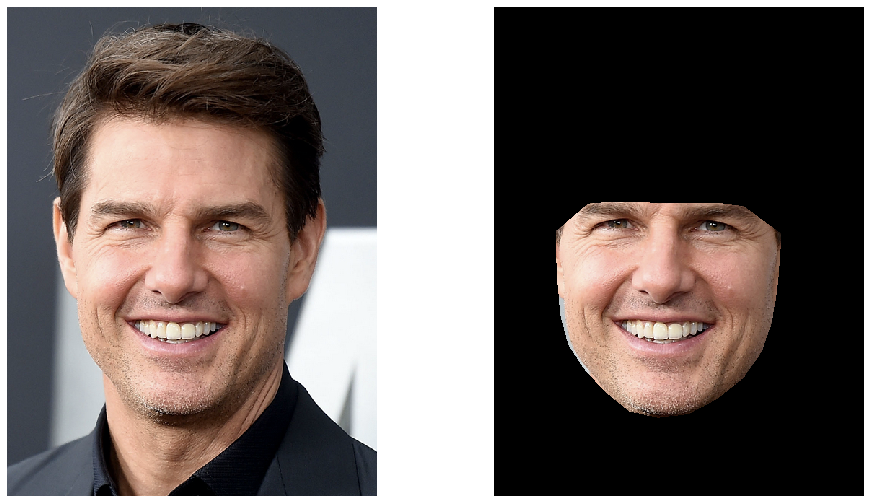

In [68]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

face = face_swapping.ref_face.copy()
ax[0].imshow(face_swapping.ref_img)
ax[0].axis(False)

ax[1].imshow(face)
ax[1].axis(False)


plt.savefig('imgs/step_3.png')
plt.show()

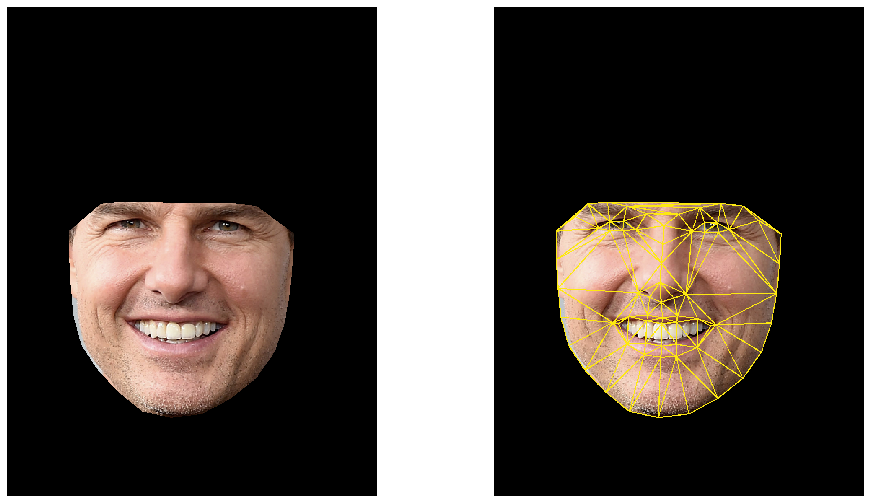

In [74]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

color = (253, 233, 16)
face = face_swapping.ref_face.copy()
ax[0].imshow(face)


for (i1, i2, i3) in face_swapping.ref_traingles_indxs:
    pt1 = tuple(face_swapping.ref_keypoints[i1])
    pt2 = tuple(face_swapping.ref_keypoints[i2])
    pt3 = tuple(face_swapping.ref_keypoints[i3])
    
    cv2.line(face, pt1, pt2, color, 2)
    cv2.line(face, pt3, pt2, color, 2)
    cv2.line(face, pt1, pt3, color, 2)

ax[1].imshow(face)

ax[0].axis(False)
ax[1].axis(False)
plt.savefig('imgs/step_4.png')
plt.show()

In [77]:
import numpy as np
import cv2
from swap import FaceSwapping

face_swapping = FaceSwapping(reference_path='imgs/reference.png')

In [78]:

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1)

while(True):
    try:
        ret, frame = cap.read()
#         cv2.imshow("preview", face_swapping(frame))
        cv2.imshow('preview', frame)
        val = cv2.waitKey(1)
        if val == 27:
            break
    except:
        break
    

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

None
